# Seattle and Boston Airbnb Data #

## CRISP-DM Framework ##

**Business Understanding**: We want to determine the rental price of Airbnb homes at certain time frames and cities such as seattle and boston. Comparing the rental rates of Airbnb homes in these two cities can be useful in predicting the rental price.  .

The business problems we are trying to uncover are:

-What features can strongly affect Airbnb rental price?
-What features distinguishes Airbnb homes in Seattle from those in Boston?
-How to differentiate the reviews based on price?

**Data Understanding**：Seattle dataset consists of 6376 fields while Boston's has 3864 fields. Both has 18 attributes each. Datasets investigation was carried out before preprocessing.
**Prepare Data**: data cleaning, filling NAN value, one-hot encoding and MinMax algorith. Kindly refer to the preprocessing section for full details.
**Data Modeling**: Using a GridSearch with a k-fold validation of five to find the best hyperparameter for the GradientBoostingRegressor. Other models were trained and compared as well. Kindly refer to the training section for full details.
**Evaluate the Results**: Result and discussion are published in https://medium.com/@sajjadmanal/deep-dive-into-seattle-and-boston-airbnb-data-d8e6fea5eab0?sk=0834ffb85786e74bd95e5e45ffe4bf23

#### Import Libraries ####

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR



#### Import Data ####

In [2]:
listings_Seattle = pd.read_csv("listings_Seattle.csv")
listings_Boston = pd.read_csv("listings_Boston.csv")

#### Explore Data ####

In [3]:
num_rows_seattle = listings_Seattle.shape[0]
num_columns_seattle = listings_Seattle.shape[1]
print('There are {} fields and {} attributes for Seattle listings.'.format(num_rows_seattle,num_columns_seattle))

num_rows_boston = listings_Boston.shape[0]
num_columns_boston = listings_Boston.shape[1]
print('There are {} fields and {} attributes for Boston listings.'.format(num_rows_boston,num_columns_boston))

There are 6376 fields and 18 attributes for Seattle listings.
There are 3864 fields and 18 attributes for Boston listings.


In [4]:
# Attributes for Seattle data.
listings_Seattle.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
# Attributes for Boston data.
listings_Boston.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [6]:
listings_Seattle.shape

(6376, 18)

In [7]:
listings_Boston.shape

(3864, 18)

In [8]:
listings_Seattle.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1087
reviews_per_month                 1087
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1459
dtype: int64

In [9]:
listings_Boston.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               3864
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1123
reviews_per_month                 1123
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1559
dtype: int64

In [10]:
listings_Seattle.drop('neighbourhood_group',axis=1,inplace=True)

In [11]:
listings_Boston.drop('neighbourhood_group',axis=1,inplace=True)

In [12]:
listings_Seattle.shape

(6376, 17)

In [13]:
listings_Boston.shape

(3864, 17)

In [14]:
listings_Seattle.drop('name',axis=1,inplace=True)

In [15]:
listings_Boston.drop('name',axis=1,inplace=True)

In [16]:
listings_Seattle.drop('host_name',axis=1,inplace=True)
listings_Seattle.drop('host_id',axis=1,inplace=True)

In [17]:
listings_Boston.drop('host_name',axis=1,inplace=True)
listings_Boston.drop('host_id',axis=1,inplace=True)

In [18]:
listings_Seattle.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,879181,Atlantic,47.60096,-122.30190,Private room,53,30,99,2022-12-16,0.80,2,247,4,STR-OPLI-19-002301
1,6606,Wallingford,47.65444,-122.33629,Entire home/apt,99,30,159,2022-09-03,0.95,3,99,2,str-opli-19-002622
2,902609,Highland Park,47.52383,-122.35287,Entire home/apt,70,2,238,2023-03-21,1.95,5,206,27,STR-OPLI-19-002360
3,9419,Georgetown,47.55017,-122.31937,Private room,55,2,175,2023-01-15,1.14,9,356,20,STR-OPLI-19-003039
4,226536,Lawton Park,47.66133,-122.40088,Private room,61,1,316,2022-12-12,2.28,1,209,53,STR-OPLI-19-000684


In [19]:
listings_Seattle.tail()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6371,743574186938554905,Loyal Heights,47.680776,-122.390584,Entire home/apt,263,30,0,NaN,NaN,1,7,0,NaN
6372,743578810848940797,Loyal Heights,47.689810,-122.379060,Entire home/apt,79,1,18,2023-03-10,5.05,1,50,18,STR-OPLI-22-001898
6373,743583595153614537,Mann,47.601920,-122.300590,Private room,36,1,11,2023-03-02,2.26,20,89,11,STR-OPLI-19-002825
6374,743600450516590869,Stevens,47.623950,-122.301550,Entire home/apt,119,1,11,2023-02-25,2.64,1,236,11,STR-OPLI-22-001817
6375,743615472351168189,Mann,47.601960,-122.298580,Private room,36,1,26,2023-02-28,5.17,20,88,26,STR-OPLI-19-002825


In [20]:
listings_Boston.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,East Boston,42.36413,-71.02991,Entire home/apt,132,32,24,2022-09-05,0.26,1,87,2,NaN
1,5506,Roxbury,42.32844,-71.09581,Entire home/apt,149,3,118,2022-12-05,0.69,10,21,8,Approved by the government
2,2021489,South Boston,42.33375,-71.04767,Private room,231,29,86,2022-08-31,1.02,5,342,1,STR-383155
3,2108738,Back Bay,42.35040,-71.08891,Entire home/apt,70,91,34,2016-08-14,0.30,1,0,0,NaN
4,2126053,Beacon Hill,42.35771,-71.06978,Entire home/apt,165,29,117,2023-03-14,1.08,1,147,6,STR-395757


In [21]:
listings_Boston.tail()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3859,840898745853352647,Dorchester,42.307301,-71.076004,Private room,45,1,0,NaN,NaN,12,359,0,Exempt: This listing is a unit that has contra...
3860,841300163917010243,Jamaica Plain,42.328629,-71.112177,Entire home/apt,318,6,1,2023-03-13,1.0,47,348,1,Str-072579
3861,841306752947174130,Back Bay,42.354257,-71.078665,Entire home/apt,163,92,0,NaN,NaN,1,352,0,NaN
3862,841340391794964228,Mattapan,42.275860,-71.072287,Entire home/apt,461,4,0,NaN,NaN,1,261,0,STR-517953
3863,842140331839890874,Back Bay,42.354116,-71.074272,Entire home/apt,159,1,0,NaN,NaN,58,108,0,Exempt: This listing is a unit that has contra...


In [22]:
listings_Seattle.isnull().sum()

id                                   0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1087
reviews_per_month                 1087
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1459
dtype: int64

In [23]:
listings_Boston.isnull().sum()

id                                   0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1123
reviews_per_month                 1123
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1559
dtype: int64

In [24]:
listings_Seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6376 non-null   int64  
 1   neighbourhood                   6376 non-null   object 
 2   latitude                        6376 non-null   float64
 3   longitude                       6376 non-null   float64
 4   room_type                       6376 non-null   object 
 5   price                           6376 non-null   int64  
 6   minimum_nights                  6376 non-null   int64  
 7   number_of_reviews               6376 non-null   int64  
 8   last_review                     5289 non-null   object 
 9   reviews_per_month               5289 non-null   float64
 10  calculated_host_listings_count  6376 non-null   int64  
 11  availability_365                6376 non-null   int64  
 12  number_of_reviews_ltm           63

In [25]:
listings_Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3864 non-null   int64  
 1   neighbourhood                   3864 non-null   object 
 2   latitude                        3864 non-null   float64
 3   longitude                       3864 non-null   float64
 4   room_type                       3864 non-null   object 
 5   price                           3864 non-null   int64  
 6   minimum_nights                  3864 non-null   int64  
 7   number_of_reviews               3864 non-null   int64  
 8   last_review                     2741 non-null   object 
 9   reviews_per_month               2741 non-null   float64
 10  calculated_host_listings_count  3864 non-null   int64  
 11  availability_365                3864 non-null   int64  
 12  number_of_reviews_ltm           38

In [26]:
listings_Seattle['reviews_per_month'].fillna(listings_Seattle['reviews_per_month'].mean(),inplace=True)

In [27]:
listings_Boston['reviews_per_month'].fillna(listings_Boston['reviews_per_month'].mean(),inplace=True)

In [28]:
listings_Seattle.drop('last_review',axis=1,inplace=True)

In [29]:
listings_Boston.drop('last_review',axis=1,inplace=True)

### Descriptive Statistics ####

In [30]:
listings_Seattle.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.376000e+03,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000
mean,2.538927e+17,47.626583,-122.334138,161.835790,12.364335,62.649467,2.137389,37.672208,181.394448,17.318381
std,3.398556e+17,0.049192,0.033081,160.151751,18.406114,101.318763,1.732742,99.954541,121.741392,23.230614
min,6.606000e+03,47.497920,-122.419050,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.571056e+07,47.602075,-122.356498,91.000000,2.000000,2.000000,0.800000,1.000000,74.000000,1.000000
50%,5.019875e+07,47.622580,-122.332818,130.000000,3.000000,21.000000,2.137389,2.000000,175.000000,7.000000
75%,6.452500e+17,47.664054,-122.311219,188.000000,30.000000,79.000000,2.810000,13.000000,295.000000,27.000000
max,8.530090e+17,47.734010,-122.240870,4000.000000,365.000000,1251.000000,22.700000,408.000000,365.000000,406.000000


In [31]:
listings_Boston.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.864000e+03,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,2.426906e+17,42.337447,-71.082387,190.609990,30.833333,42.162526,1.713707,62.917702,199.546325,11.995083
std,3.417762e+17,0.027102,0.033245,251.949604,39.849525,83.892998,1.638037,111.174969,130.433047,21.560316
min,3.781000e+03,42.235300,-71.173486,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.531438e+07,42.321645,-71.100360,85.000000,2.000000,0.000000,0.530000,2.000000,78.750000,0.000000
50%,4.816150e+07,42.344725,-71.073305,148.500000,27.500000,7.000000,1.713707,8.000000,220.000000,1.000000
75%,6.419824e+17,42.354291,-71.060810,225.000000,32.000000,44.250000,1.770000,50.000000,322.000000,15.000000
max,8.493358e+17,42.392280,-70.996000,10000.000000,600.000000,821.000000,18.950000,340.000000,365.000000,212.000000


#### Visualize Data ####

C:\Users\User\AppData\Local\Temp\ipykernel_10992\3271539363.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(listings_Seattle.corr(), cmap='bwr', annot=True)


<Axes: >

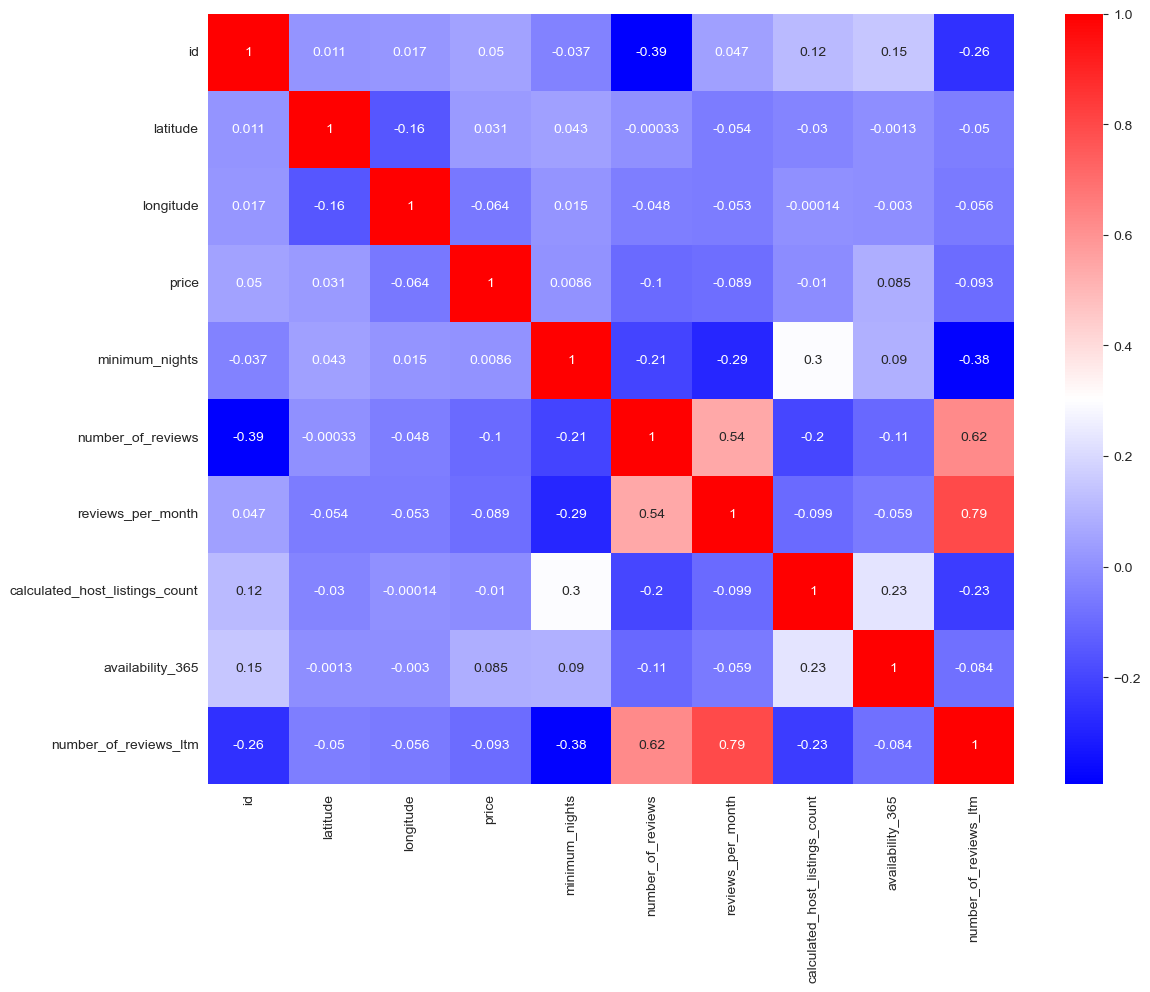

In [32]:
plt.figure(figsize=(13, 10))
sns.heatmap(listings_Seattle.corr(), cmap='bwr', annot=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10992\845242900.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(listings_Boston.corr(), cmap='bwr', annot=True)


<Axes: >

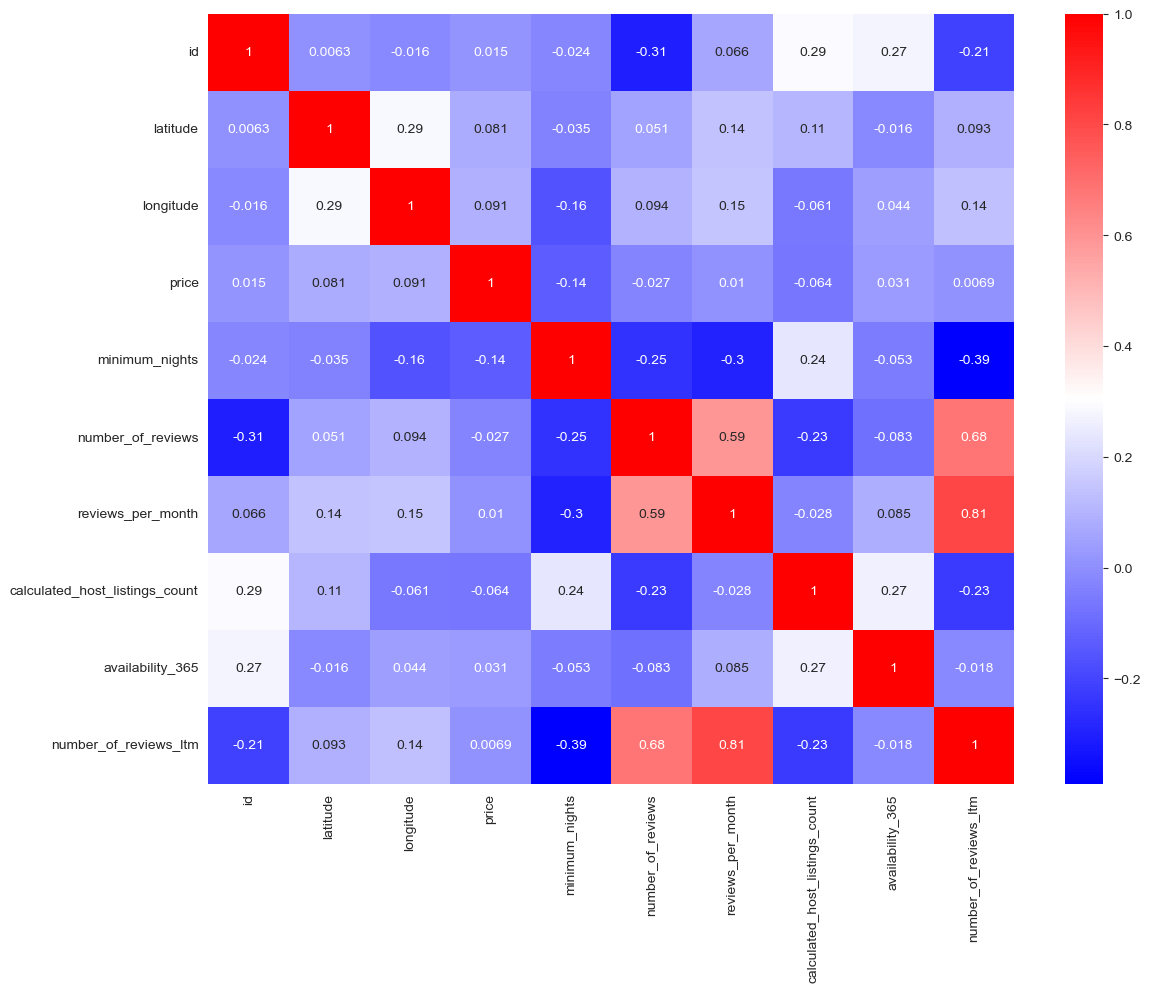

In [33]:
plt.figure(figsize=(13, 10))
sns.heatmap(listings_Boston.corr(), cmap='bwr', annot=True)

#### Preprocess Data ####

In [34]:
# label_encoder understand word labels.
label_encoder = preprocessing.LabelEncoder()

#### Transform Data ####

In [35]:
# Encode labels in column 'species'.
listings_Seattle['room_type']= label_encoder.fit_transform(listings_Seattle['room_type'])

In [36]:
# Encode labels in column 'species'.
listings_Boston['room_type']= label_encoder.fit_transform(listings_Boston['room_type'])

In [37]:
listings_Seattle['neighbourhood']= label_encoder.fit_transform(listings_Seattle['neighbourhood'])

In [38]:
listings_Boston['neighbourhood']= label_encoder.fit_transform(listings_Boston['neighbourhood'])

In [39]:
listings_Seattle['neighbourhood'].unique()

array([ 3, 81, 31, 24, 37, 47, 18, 84,  1, 56, 83, 58, 26, 86,  9, 20, 17,
       21, 76, 36, 51, 62, 25, 39, 14, 35, 53, 13, 44, 16, 27, 11, 43, 41,
       50, 38, 19, 23, 12, 78, 70, 65,  4,  8, 29, 72,  0,  5,  7, 34, 61,
       42, 40, 80, 45, 59, 30, 22, 88, 55, 63, 79, 69, 28, 52, 48, 87, 10,
       77, 67, 75, 15, 57, 54, 66, 60,  6, 46, 49, 82, 64, 85, 71, 74, 33,
        2, 73, 68, 32])

In [40]:
listings_Boston['neighbourhood'].unique()

array([ 9, 19, 20,  1,  3,  8, 12,  0,  7, 17, 22,  4,  2,  5, 11, 18, 16,
       24, 10, 21,  6, 23, 15, 14, 13])

In [41]:
correlation = listings_Seattle.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price                             1.000000
availability_365                  0.084992
id                                0.050016
latitude                          0.030515
minimum_nights                    0.008561
calculated_host_listings_count   -0.010457
neighbourhood                    -0.033204
longitude                        -0.063671
reviews_per_month                -0.089357
number_of_reviews_ltm            -0.093458
number_of_reviews                -0.103815
room_type                        -0.199203
Name: price, dtype: float64 



C:\Users\User\AppData\Local\Temp\ipykernel_10992\3767392299.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = listings_Seattle.corr()


In [42]:
correlation = listings_Boston.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price                             1.000000
longitude                         0.090658
latitude                          0.081329
availability_365                  0.030878
id                                0.014822
reviews_per_month                 0.010313
neighbourhood                     0.010289
number_of_reviews_ltm             0.006948
number_of_reviews                -0.026665
calculated_host_listings_count   -0.064095
minimum_nights                   -0.135298
room_type                        -0.255068
Name: price, dtype: float64 



C:\Users\User\AppData\Local\Temp\ipykernel_10992\1312201303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = listings_Boston.corr()


In [43]:
listings_Seattle.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,879181,3,47.60096,-122.30190,2,53,30,99,0.80,2,247,4,STR-OPLI-19-002301
1,6606,81,47.65444,-122.33629,0,99,30,159,0.95,3,99,2,str-opli-19-002622
2,902609,31,47.52383,-122.35287,0,70,2,238,1.95,5,206,27,STR-OPLI-19-002360
3,9419,24,47.55017,-122.31937,2,55,2,175,1.14,9,356,20,STR-OPLI-19-003039
4,226536,37,47.66133,-122.40088,2,61,1,316,2.28,1,209,53,STR-OPLI-19-000684


In [44]:
listings_Seattle.tail()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6371,743574186938554905,40,47.680776,-122.390584,0,263,30,0,2.137389,1,7,0,NaN
6372,743578810848940797,40,47.689810,-122.379060,0,79,1,18,5.050000,1,50,18,STR-OPLI-22-001898
6373,743583595153614537,43,47.601920,-122.300590,2,36,1,11,2.260000,20,89,11,STR-OPLI-19-002825
6374,743600450516590869,76,47.623950,-122.301550,0,119,1,11,2.640000,1,236,11,STR-OPLI-22-001817
6375,743615472351168189,43,47.601960,-122.298580,2,36,1,26,5.170000,20,88,26,STR-OPLI-19-002825


In [45]:
listings_Boston.head()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,9,42.36413,-71.02991,0,132,32,24,0.26,1,87,2,NaN
1,5506,19,42.32844,-71.09581,0,149,3,118,0.69,10,21,8,Approved by the government
2,2021489,20,42.33375,-71.04767,2,231,29,86,1.02,5,342,1,STR-383155
3,2108738,1,42.35040,-71.08891,0,70,91,34,0.30,1,0,0,NaN
4,2126053,3,42.35771,-71.06978,0,165,29,117,1.08,1,147,6,STR-395757


In [46]:
listings_Boston.tail()

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
3859,840898745853352647,7,42.307301,-71.076004,2,45,1,0,1.713707,12,359,0,Exempt: This listing is a unit that has contra...
3860,841300163917010243,12,42.328629,-71.112177,0,318,6,1,1.000000,47,348,1,Str-072579
3861,841306752947174130,1,42.354257,-71.078665,0,163,92,0,1.713707,1,352,0,NaN
3862,841340391794964228,15,42.275860,-71.072287,0,461,4,0,1.713707,1,261,0,STR-517953
3863,842140331839890874,1,42.354116,-71.074272,0,159,1,0,1.713707,58,108,0,Exempt: This listing is a unit that has contra...


#### Visualize Data ####

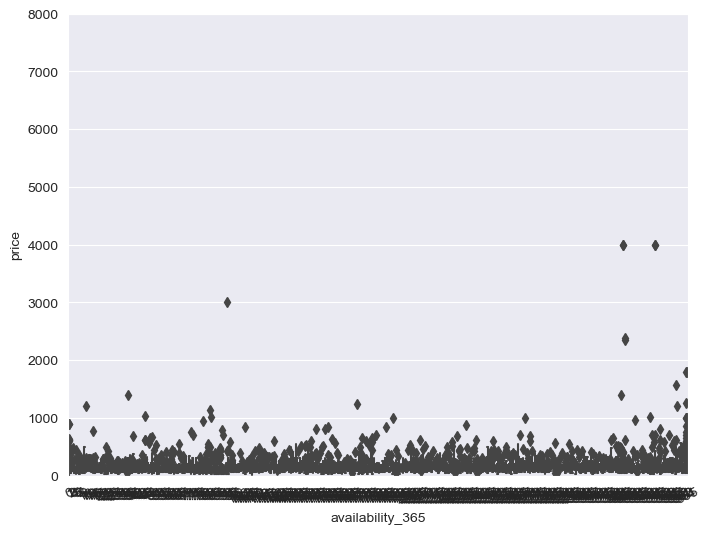

In [47]:
var = 'availability_365'
data = pd.concat([listings_Seattle['price'], listings_Seattle[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000);
xt = plt.xticks(rotation=25)

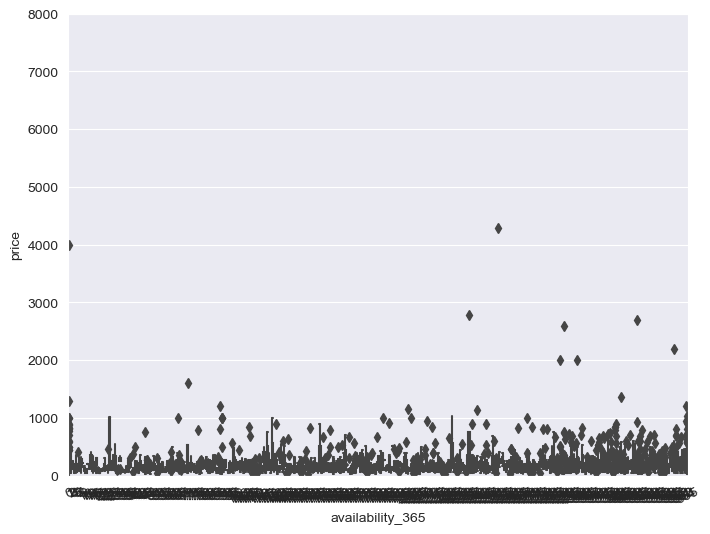

In [48]:
var = 'availability_365'
data = pd.concat([listings_Boston['price'], listings_Boston[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=8000);
xt = plt.xticks(rotation=25)

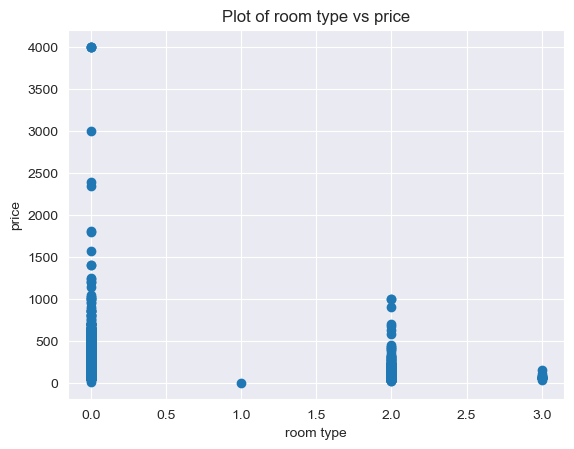

In [49]:
plt.scatter(listings_Seattle.room_type, listings_Seattle.price)

plt.title('Plot of room type vs price') # Adding a title to the plot
plt.xlabel("room type") # Adding the label for the horizontal axis
plt.ylabel("price") # Adding the label for the vertical axis
plt.show()

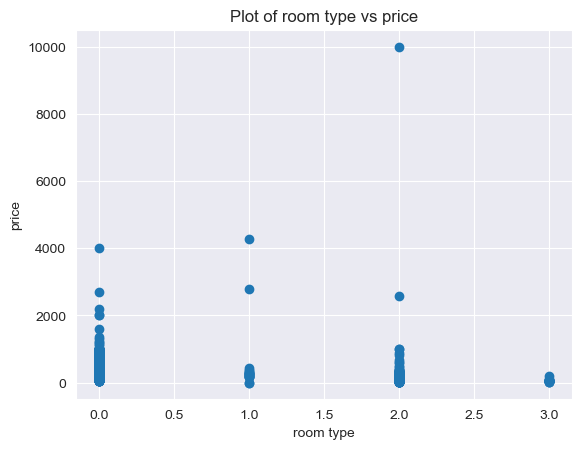

In [50]:
plt.scatter(listings_Boston.room_type, listings_Boston.price)

plt.title('Plot of room type vs price') # Adding a title to the plot
plt.xlabel("room type") # Adding the label for the horizontal axis
plt.ylabel("price") # Adding the label for the vertical axis
plt.show()

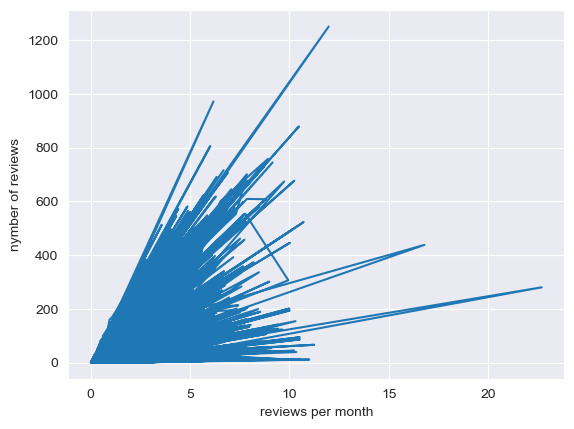

In [51]:
plt.plot(listings_Seattle.reviews_per_month,listings_Seattle.number_of_reviews) # 2 arguments: X and Y points
plt.xlabel("reviews per month") # Adding the label for the horizontal axis
plt.ylabel("nymber of reviews")
plt.show()

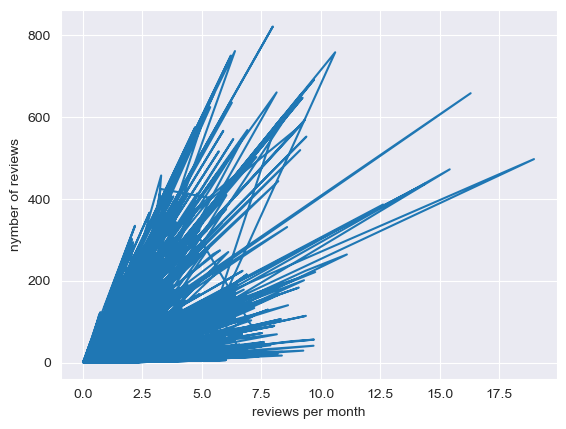

In [52]:
plt.plot(listings_Boston.reviews_per_month,listings_Boston.number_of_reviews) # 2 arguments: X and Y points
plt.xlabel("reviews per month") # Adding the label for the horizontal axis
plt.ylabel("nymber of reviews")
plt.show()

In [53]:
listings_Seattle.shape

(6376, 13)

In [54]:
listings_Boston.shape

(3864, 13)

#### Model Data ####

In [55]:
y_listings_Seattle = listings_Seattle[['price']] # target variable i.e ill or not
X_listings_Seattle = listings_Seattle.drop(['price'], axis=1)

In [56]:
y_listings_Boston = listings_Boston[['price']] # target variable i.e ill or not
X_listings_Boston = listings_Boston.drop(['price'], axis=1)

In [57]:
# Use MinMax algorithm for processing the numerical data
scaler = MinMaxScaler()
numerical = ['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']
listings_Seattle[numerical] = scaler.fit_transform(listings_Seattle[numerical])

In [58]:
scaler = MinMaxScaler()
numerical = ['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']
listings_Boston[numerical] = scaler.fit_transform(listings_Boston[numerical])

In [59]:
X_listings_Seattle = X_listings_Seattle.apply(pd.to_numeric, errors='coerce')
y_listings_Seattle = y_listings_Seattle.apply(pd.to_numeric, errors='coerce')

In [60]:
X_listings_Boston = X_listings_Boston.apply(pd.to_numeric, errors='coerce')
y_listings_Boston = y_listings_Boston.apply(pd.to_numeric, errors='coerce')

In [61]:
X_listings_Seattle.fillna(0, inplace=True)
y_listings_Seattle.fillna(0, inplace=True)

In [62]:
X_listings_Boston.fillna(0, inplace=True)
y_listings_Boston.fillna(0, inplace=True)

In [63]:
lr = LinearRegression()

#### Split Data ####

In [64]:
X_listings_Seattle_train,X_listings_Seattle_test,y_listings_Seattle_train,y_listings_Seattle_test=train_test_split(X_listings_Seattle,y_listings_Seattle,test_size=0.20,random_state=1)
clf_Seattle = LinearRegression().fit(X_listings_Seattle_train, y_listings_Seattle_train)

In [65]:
X_listings_Boston_train,X_listings_Boston_test,y_listings_Boston_train,y_listings_Boston_test=train_test_split(X_listings_Boston,y_listings_Boston,test_size=0.20,random_state=1)
clf_Boston = LinearRegression().fit(X_listings_Boston_train, y_listings_Boston_train)

In [66]:
listings_Seattle = listings_Seattle.apply(pd.to_numeric, errors='coerce')

In [67]:
listings_Boston = listings_Boston.apply(pd.to_numeric, errors='coerce')

In [68]:
listings_Seattle.fillna(0, inplace=True)

In [69]:
listings_Boston.fillna(0, inplace=True)

In [70]:
listings_Seattle_test = listings_Seattle[['price']]

In [71]:
listings_Boston_test = listings_Boston[['price']]

#### Evaluate Data ####

In [72]:
lr.fit(listings_Seattle, listings_Seattle_test)

LinearRegression()

In [73]:
lr.fit(listings_Boston, listings_Boston_test)

LinearRegression()

In [74]:
y_pred_Seattle=clf_Seattle.predict(X_listings_Seattle_test)

In [75]:
y_pred_Boston=clf_Boston.predict(X_listings_Boston_test)

In [76]:
# print result of MSE for Seattle
print("MSE for Seattle: {}.".format(mean_squared_error(y_listings_Seattle_test, y_pred_Seattle)))

MSE for Seattle: 32410.718576554016.


In [77]:
# print result of MSE for Boston
print("MSE for Boston: {}.".format(mean_squared_error(y_listings_Boston_test, y_pred_Boston)))

MSE for Boston: 27795.0543035194.


In [78]:
# print result of RMSE for Seattle
print("RMSE for Seattle: {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Seattle_test, y_pred_Seattle))))

RMSE for Seattle: 180.02977136172234.


In [79]:
# print result of RMSE for Boston
print("RMSE for Boston: {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Boston_test, y_pred_Boston))))

RMSE for Boston: 166.71848818748148.


In [80]:
# print result of MAE for Seattle
print("MAE for Seattle: {}.".format(mean_absolute_error(y_listings_Seattle_test, y_pred_Seattle)))

MAE for Seattle: 77.8214342958872.


In [81]:
# print result of MAE for Boston
print("MAE for Boston: {}.".format(mean_absolute_error(y_listings_Boston_test, y_pred_Boston)))

MAE for Boston: 107.38184644950783.


In [82]:
y_pred_clf_Seattle_train=clf_Seattle.predict(X_listings_Seattle_train)
print("RMSE for y_pred_clf_Seattle_train : {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Seattle_test, y_pred_Seattle))))

RMSE for y_pred_clf_Seattle_train : 180.02977136172234.


In [83]:
y_pred_clf_Boston_train=clf_Boston.predict(X_listings_Boston_train)
print("RMSE for y_pred_clf_Boston_train : {}.".format((np.sqrt(metrics.mean_squared_error(y_listings_Boston_test, y_pred_Boston)))))

RMSE for y_pred_clf_Boston_train : 166.71848818748148.


In [84]:
print("r2_score for Seattle: {}.".format((metrics.r2_score(y_listings_Seattle_test, y_pred_Seattle))))

r2_score for Seattle: 0.01777648418211264.


In [85]:
print("r2_score for Boston: {}.".format((metrics.r2_score(y_listings_Boston_test, y_pred_Boston))))

r2_score for Boston: 0.012621300585049844.


In [86]:
# compute with statsmodels for Seattle, by adding intercept manually
import statsmodels.api as sm
X1_listings_Seattle = sm.add_constant(X_listings_Seattle)
result = sm.OLS(y_listings_Seattle, X1_listings_Seattle).fit()
print("statsmodels result for Seattle: {}.".format((result.rsquared_adj)))

statsmodels result for Seattle: -0.6054548938488844.


In [87]:
# compute with statsmodels for Boston, by adding intercept manually
import statsmodels.api as sm
X1_listings_Boston = sm.add_constant(X_listings_Boston)
result = sm.OLS(y_listings_Boston, X1_listings_Boston).fit()
print("statsmodels result for Boston: {}.".format((result.rsquared_adj)))

statsmodels result for Boston: -0.36982822458910247.


In [88]:
reg=RandomForestRegressor(max_depth=25,n_estimators=700,random_state=0)

In [89]:
reg.fit(X_listings_Seattle_train,y_listings_Seattle_train)
y_pred1_Seattle=reg.predict(X_listings_Seattle_test)

C:\Users\User\AppData\Local\Temp\ipykernel_10992\1931773547.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_listings_Seattle_train,y_listings_Seattle_train)


In [90]:
reg.fit(X_listings_Boston_train,y_listings_Boston_train)
y_pred1_Boston=reg.predict(X_listings_Boston_test)

C:\Users\User\AppData\Local\Temp\ipykernel_10992\557372147.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_listings_Boston_train,y_listings_Boston_train)


In [91]:
# print result of MAE for Seattle
print("MAE for y_pred1_Seattle: {}.".format((metrics.mean_absolute_error(y_listings_Seattle_test, y_pred1_Seattle))))

MAE for y_pred1_Seattle: 65.26628905590687.


In [92]:
#print result of MSE for Seattle
print("MSE for y_pred1_Seattle: {}.".format((metrics.mean_squared_error(y_listings_Seattle_test, y_pred1_Seattle))))

MSE for y_pred1_Seattle: 25400.962451140826.


In [93]:
#print result of RMSE for Seattle
print("RMSE for y_pred1_Seattle: {}.".format((np.sqrt(metrics.mean_squared_error(y_listings_Seattle_test, y_pred1_Seattle)))))

RMSE for y_pred1_Seattle: 159.37679395426684.


In [94]:
# print result of MAE for Boston
print("MAE for y_pred1_Boston: {}.".format((metrics.mean_absolute_error(y_listings_Boston_test, y_pred1_Boston))))

MAE for y_pred1_Boston: 69.29278899952034.


In [95]:
#print result of MSE for Boston
print("MSE for y_pred1_Boston: {}.".format((metrics.mean_squared_error(y_listings_Boston_test, y_pred1_Boston))))

MSE for y_pred1_Boston: 23518.77239429954.


In [96]:
#print result of RMSE for Boston
print("RMSE for y_pred1_Boston: {}.".format((np.sqrt(metrics.mean_squared_error(y_listings_Boston_test, y_pred1_Boston)))))

RMSE for y_pred1_Boston: 153.35831374366222.


In [97]:
y_pred_train_Seattle=reg.predict(X_listings_Seattle_train)

In [98]:
y_pred_train_Boston=reg.predict(X_listings_Boston_train)

In [99]:
print("MSE for y_pred_train_Seattle: {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Seattle_test, y_pred_Seattle))))

MSE for y_pred_train_Seattle: 180.02977136172234.


In [100]:
print("MSE for y_pred_train_Boston: {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Boston_test, y_pred_Boston))))

MSE for y_pred_train_Boston: 166.71848818748148.


In [101]:
best_svr = SVR(kernel='rbf')
best_svr.fit(X_listings_Seattle_train, y_listings_Seattle_train)
y_pred_cross_Seattle=best_svr.predict(X_listings_Seattle_test)
print("MSE for y_pred_train_Seattle: {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Seattle_test, y_pred_cross_Seattle))))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE for y_pred_train_Seattle: 184.65272465188494.


In [102]:
best_svr = SVR(kernel='rbf')
best_svr.fit(X_listings_Boston_train, y_listings_Boston_train)
y_pred_cross_Boston=best_svr.predict(X_listings_Boston_test)
print("MSE for y_pred_train_Seattle: {}.".format(np.sqrt(metrics.mean_squared_error(y_listings_Boston_test, y_pred_cross_Boston))))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE for y_pred_train_Seattle: 171.59302168815884.


In [103]:
print("r2_score for Seattle: {}.".format(metrics.r2_score(y_listings_Seattle_test, y_pred1_Seattle)))

r2_score for Seattle: 0.23021075311899597.


In [104]:
print("r2_score for Boston: {}.".format(metrics.r2_score(y_listings_Boston_test, y_pred1_Boston)))

r2_score for Boston: 0.16452996835558042.


In [105]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=20, random_state=42, shuffle=True)
for train_index_Seattle, test_index_Seattle in cv.split(X_listings_Seattle):
    print("Train Index Seattle: ", train_index_Seattle, "\n")
print("Test Index Seattle: ", test_index_Seattle)

X_listings_Seattle_train, X_listings_Seattle_test, y_listings_Seattle_train, y_listings_Seattle_test = X_listings_Seattle[train_index_Seattle], X_listings_Seattle[test_index_Seattle], y_listings_Seattle[train_index_Seattle], y[test_index_Seattle]
best_svr.fit(X_listings_Seattle_train, y_listings_Seattle_train)
scores.append(best_svr.score(X_listings_Seattle_test, y_listings_Seattle_test))

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6372 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6372 6373 6374] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   1    2    3 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6372 6373 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ... 6373 6374 6375] 

Train Index Seattle:  [   0    2    3 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    3 ... 6373 6374 6375] 

Train Index Seattle:  [   0    1    2 ..

KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n            ...\n            6366, 6367, 6368, 6369, 6370, 6371, 6372, 6373, 6374, 6375],\n           dtype='int64', length=6058)] are in the [columns]"

In [106]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=20, random_state=42, shuffle=True)
for train_index_Boston, test_index_Boston in cv.split(X_listings_Boston):
    print("Train Index Boston: ", train_index_Seattle, "\n")
print("Test Index Boston: ", test_index_Boston)

X_listings_Boston_train, X_listings_Boston_test, y_listings_Boston_train, y_listings_Boston_test = X_listings_Boston[train_index_Boston], X_listings_Boston[test_index_Boston], y_listings_Boston[train_index_Boston], y[test_index_Boston]
best_svr.fit(X_listings_Boston_train, y_listings_Boston_train)
scores.append(best_svr.score(X_listings_Boston_test, y_listings_Boston_test))

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375] 

Train Index Boston:  [   0    1    2 ... 6373 6374 6375]

KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n            ...\n            3854, 3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863],\n           dtype='int64', length=3671)] are in the [columns]"

In [107]:
best_svr.fit(X_listings_Seattle_train, y_listings_Seattle_train)
scores.append(best_svr.score(X_listings_Seattle_test, y_listings_Seattle_test))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
best_svr.fit(X_listings_Boston_train, y_listings_Boston_train)
scores.append(best_svr.score(X_listings_Boston_test, y_listings_Boston_test))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
cross_val_score(best_svr, X_listings_Seattle, y_listings_Seattle, cv=12)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([-0.0279765 , -0.05155877, -0.08217158, -0.03240567, -0.08741005,
       -0.05291672, -0.09802771, -0.05232533, -0.0288253 , -0.03646006,
       -0.02533686, -0.01514277])

In [110]:
cross_val_score(best_svr, X_listings_Boston, y_listings_Boston, cv=12)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([-0.00292041, -0.00350624, -0.00943488, -0.0170192 , -0.0071552 ,
       -0.31721476, -0.11803064, -0.15186611, -0.11565365, -0.04790996,
       -0.15555013, -0.00147483])

In [111]:
cross_val_predict(best_svr, X_listings_Seattle, y_listings_Seattle, cv=8)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([127.8997755 , 127.8997755 , 127.8997755 , ..., 144.03535004,
       144.03469662, 144.03411428])

In [112]:
cross_val_predict(best_svr, X_listings_Boston, y_listings_Boston, cv=8)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

array([150.10000012, 150.10000012, 150.10000012, ..., 169.1861708 ,
       169.1859818 , 169.18143421])

#### Deployment ####

In [113]:
listings_NYC=pd.read_csv('listings_NYC.csv')

In [114]:
listings_NYC.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [115]:
listings_NYC.shape

(48895, 16)

In [116]:
listings_NYC.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [117]:
listings_NYC.drop('neighbourhood_group',axis=1,inplace=True)
listings_NYC.drop('id',axis=1,inplace=True)
listings_NYC.drop('name',axis=1,inplace=True)
listings_NYC.drop('host_id',axis=1,inplace=True)
listings_NYC.drop('host_name',axis=1,inplace=True)

In [118]:
listings_NYC.shape

(48895, 11)

In [119]:
listings_NYC.drop('last_review',axis=1,inplace=True)

In [120]:
listings_NYC['reviews_per_month'].fillna(listings_NYC['reviews_per_month'].mean(),inplace=True)

In [121]:
# label_encoder object understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
listings_NYC['room_type']= label_encoder.fit_transform(listings_NYC['room_type'])

listings_NYC['neighbourhood']= label_encoder.fit_transform(listings_NYC['neighbourhood'])

In [153]:
listings_NYC_test = listings_NYC[['price']]
best_svr.fit(listings_NYC, listings_NYC_test)
price=best_svr.predict(listings_NYC)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [173]:
d1 = {'price':price[:,]}
df2 = pd.DataFrame(d1,)
df2.shape

(48895, 1)

In [174]:
df2.head()

,price
0,148.293876
1,226.562884
2,149.690895
3,93.909330
4,79.251394


In [176]:
airbnb_csv = df2.to_csv('C:/Users/User/Desktop/Udacity-Data-Scientist-Nanodegree/Seattle_Boston_NYC_airbnb_csv',index=False)